<a href="https://colab.research.google.com/github/prabhu94/clustering_and_nlp/blob/master/data_setup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Get all necessary packages

!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     - 44.2MB 793kB/s
     |████████████████████████████████| 61kB 6.7MB/s 
     |████████████████████████████████| 604kB 20.6MB/s 
     |████████████████████████████████| 3.1MB 30.5MB/s 
     |████████████████████████████████| 71kB 9.7MB/s 
     |████████████████████████████████| 296kB 40.4MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.8.0-py2.py3-none-any.whl size=259932 sha256=bc745f2ce5a84a229fd6c8f9172eed11482a1bcdde05bcaeeaeac6aaa7f4510a
  Stored in directory: /tmp/pip-ephem-wheel-cache-mzt2wn3j/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
  Created wheel for confuse: filename=confuse-1.1.0-cp36-none-any.whl size=17574 sha256=f54c69794e0713875006ee0524ff104103e76364ae69dfb334e02f548a352d0c
  Stored in directory: /root/.cache/pip/wheels/f6/8b/23/41a1b516f6d8d4cc81f5bdb55394a47cdbe9659c53668d3c9e
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27084 sha256=5604b1d29cd7da0bcc3bf1f03a1e64dc4ad196e972287fe487b9

In [0]:
import pandas as pd

df = pd.read_excel("/content/drive/My Drive/Colab Notebooks/joyneel/dataset.xlsx")

In [6]:
df.columns

Index(['USER_ID', 'USER', 'A/G RATIO', 'ALANINE AMINOTRANSFERASE (ALT/SGPT)',
       'ALBUMIN', 'ALKALINE PHOSPHATASE',
       'ASPARTATE AMINOTRANSFERASE (AST/SGOT)', 'BACTERIA', 'BASOPHILS',
       'BASOPHILS %', 'BILIRUBIN (INDIRECT)', 'BILIRUBIN CONJUGATED (DIRECT)',
       'BILIRUBIN, TOTAL', 'BLOOD', 'BLOOD UREA NITROGEN', 'BODY MASS INDEX',
       'CALCIUM', 'CASTS', 'CHOL / HDL RATIO', 'COLOUR', 'CREATININE',
       'CRYSTALS', 'Diastolic', 'EOSINOPHILS', 'EOSINOPHILS %',
       'EPITHELIAL CELLS', 'ESR (ERYTHROCYTE SEDIMENTATION RATE)',
       'ESTIMATED AVERAGE GLUCOSE (eAG)', 'Electrocardiogram (ECG)',
       'GAMMA GLUTAMYL TRANSPEPTIDASE (GGT)', 'GLOBULIN', 'GLUCOSE',
       'GLUCOSE, FASTING', 'HAEMOGLOBIN', 'HDL CHOLESTEROL', 'HEIGHT',
       'HS-CRP (HIGH SENSITIVITY C-REACTIVE PROTEIN)',
       'HbA1c, GLYCATED HEMOGLOBIN', 'KETONES', 'LDL CHOLESTEROL',
       'LYMPHOCYTES', 'LYMPHOCYTES %', 'MCH', 'MCHC', 'MCV', 'MONOCYTES',
       'MONOCYTES %', 'NEUTROPHILS', 'NEUTR

In [0]:
def name_age_splitter(field):
  split = field.split("_")
  return split[1]

In [0]:
df['AGE'] = df['USER'].apply(name_age_splitter)

In [0]:
df['USER_ID'] = [x+1 for x in df.index]

In [0]:
df = df.drop(columns=['USER'])

In [0]:
df.to_csv("/content/drive/My Drive/Colab Notebooks/joyneel/masked.csv")

In [12]:
# get a data profile

# Sample a part of the data set and check the profile.
print("The length of the dataset : ", len(df))
sampled_df = df.sample(n=100, random_state=1)

# 
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title="Pandas Minimal Profiling Report", minimal=True)
from pandas_profiling import ProfileReport

sampled_profile = ProfileReport(sampled_df, title="Pandas Profiling Report",minimal=False)

The length of the dataset :  2534


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [13]:
sampled_profile

In [14]:
profile.to_file("/content/drive/My Drive/Colab Notebooks/joyneel/min_profile.html")
sampled_profile.to_file("/content/drive/My Drive/Colab Notebooks/joyneel/profile.html")

In [36]:
# Remove Columns/Rows
import numpy as np
# Remove columns that have more than 70 % data missing
miss_data_columns = df.isna().sum()/len(df)
miss_data_columns = pd.DataFrame(miss_data_columns)
miss_data_columns.columns = ['null_ratio']
miss_data_columns['ignore'] = np.where(miss_data_columns['null_ratio']>=0.7, 1, 0)
columns_to_ignore = miss_data_columns.loc[miss_data_columns['ignore']==1].index.tolist()

# ignore peripheral smear as well. We can topic model this later
columns_to_ignore.append("PERIPHERAL SMEAR")
peripheral_smear = df['PERIPHERAL SMEAR']

# Remove observed Age outlier
# df = df.drop([1787])

# Get the columns with complete data
columns_to_keep = [x for x in df.columns if x not in columns_to_ignore]
processed_one = df[columns_to_keep]
processed_one.to_csv("/content/drive/My Drive/Colab Notebooks/joyneel/processed_one.csv")

# get the info for processed_one
processed_one.iloc[1201,processed_one.columns.get_loc('BLOOD UREA NITROGEN')] = 7.94
processed_one.iloc[1695,processed_one.columns.get_loc('Diastolic')] = np.nan
processed_one.iloc[1695,processed_one.columns.get_loc('Systolic')] = np.nan
processed_one.iloc[1799,processed_one.columns.get_loc('TRIGLYCERIDES')] = 500
processed_one.iloc[1944,processed_one.columns.get_loc('TRIGLYCERIDES')] = 500
processed_one.iloc[18,processed_one.columns.get_loc('TRIGLYCERIDES')] = 500
processed_one.iloc[268,processed_one.columns.get_loc('TRIGLYCERIDES')] = 500
processed_one.iloc[929,processed_one.columns.get_loc('TRIGLYCERIDES')] = 500
processed_one.iloc[1560,processed_one.columns.get_loc('TRIGLYCERIDES')] = 500
processed_one.iloc[284,processed_one.columns.get_loc('TRIGLYCERIDES')] = 500
processed_one.iloc[986,processed_one.columns.get_loc('TRIGLYCERIDES')] = 500
processed_one.iloc[2253,processed_one.columns.get_loc('TRIGLYCERIDES')] = 500

#122,243,489,661,794,1162,1311
processed_one.iloc[122,processed_one.columns.get_loc('TSH')] = 0.015
processed_one.iloc[243,processed_one.columns.get_loc('TSH')] = 0.015
processed_one.iloc[489,processed_one.columns.get_loc('TSH')] = 0.015
processed_one.iloc[661,processed_one.columns.get_loc('TSH')] = 0.015
processed_one.iloc[794,processed_one.columns.get_loc('TSH')] = 0.015
processed_one.iloc[1162,processed_one.columns.get_loc('TSH')] = 0.015
processed_one.iloc[1311,processed_one.columns.get_loc('TSH')] = 0.015
processed_one.iloc[1906,processed_one.columns.get_loc('TSH')] = 0.015
processed_one.iloc[2080,processed_one.columns.get_loc('TSH')] = 0.015

#592,1180,1701
processed_one.iloc[592,processed_one.columns.get_loc('TSH')] = 100
processed_one.iloc[1180,processed_one.columns.get_loc('TSH')] = 100
processed_one.iloc[1701,processed_one.columns.get_loc('TSH')] = 100

processed_one.iloc[2365,processed_one.columns.get_loc('PLATELET COUNT')] = 150000

# processed_one.to_csv("/content/drive/My Drive/Colab Notebooks/joyneel/processed_two.csv")
# processed_two = pd.read_csv("/content/drive/My Drive/Colab Notebooks/joyneel/processed_two.csv")

for x in processed_one.columns:
  if processed_one[x].dtype =='object':
    print(x)
    processed_one[x] = processed_one[x].astype('float64')

# use non parameterized knn to impute the numerical values
import numpy as np
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
imputer.fit(processed_one)
processed_two = imputer.transform(processed_one)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


BLOOD UREA NITROGEN
Diastolic
PLATELET COUNT
Systolic
TRIGLYCERIDES
TSH
AGE


In [0]:
# processed_one.iloc[processed_one.loc[processed_one['TSH']=='<0.015'].index,processed_one.columns.get_loc('TSH')] 

In [0]:
processed_two = pd.DataFrame(processed_two,columns=processed_one.columns)


In [39]:
processed_two.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2534 entries, 0 to 2533
Data columns (total 53 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   USER_ID                                2534 non-null   float64
 1   A/G RATIO                              2534 non-null   float64
 2   ALANINE AMINOTRANSFERASE (ALT/SGPT)    2534 non-null   float64
 3   ALBUMIN                                2534 non-null   float64
 4   ALKALINE PHOSPHATASE                   2534 non-null   float64
 5   ASPARTATE AMINOTRANSFERASE (AST/SGOT)  2534 non-null   float64
 6   BASOPHILS                              2534 non-null   float64
 7   BASOPHILS %                            2534 non-null   float64
 8   BILIRUBIN (INDIRECT)                   2534 non-null   float64
 9   BILIRUBIN CONJUGATED (DIRECT)          2534 non-null   float64
 10  BILIRUBIN, TOTAL                       2534 non-null   float64
 11  BLOO

In [40]:
from sklearn import preprocessing

x = processed_two.loc[:,~processed_two.columns.isin(['USER_ID'])].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
ss_scaler = preprocessing.StandardScaler()

x_scaled = ss_scaler.fit_transform(x)
processed_three = pd.DataFrame(x_scaled)
print("length of features : ", processed_three.shape[1])

length of features :  52


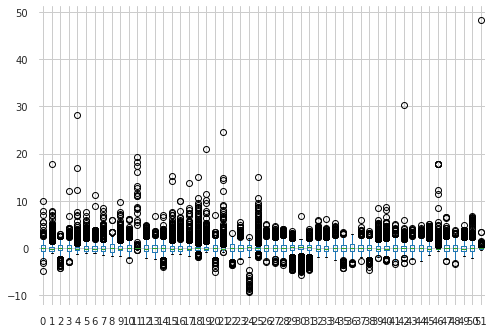

In [41]:
boxplot = processed_three.boxplot()


In [42]:
# Perform PCA to reduce number of features (useful for clustering)pca = PCA(n_components=2, svd_solver='full')
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(processed_three)
pca_processed = pca.transform(processed_three)

print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.15524919 0.08498718]
[143.02753455 105.8233932 ]


In [43]:
# PCA data
pca_processed.shape

(2534, 2)

In [0]:

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(pca_processed)
y_kmeans = kmeans.predict(pca_processed)



In [45]:
centers = kmeans.cluster_centers_
centers.shape

(4, 2)

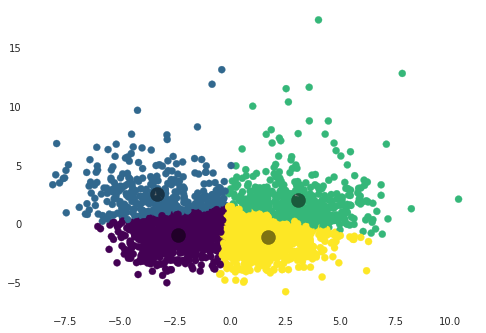

In [46]:
import matplotlib.pyplot as plt
plt.scatter(pca_processed[:, 0], pca_processed[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [0]:
# Use GMM 

from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components = 4)
gmm.fit(pca_processed)
y_gmm = gmm.predict(pca_processed)


In [49]:
print(gmm.means_)
print('\n')
print(gmm.covariances_)
print('\n')
print(y_gmm)

[[-2.35953471 -0.65107958]
 [ 2.66228884  1.50576386]
 [ 1.84621014 -0.56559765]
 [-3.43381554  1.87380291]]


[[[ 1.54075359  0.38005957]
  [ 0.38005957  1.88244504]]

 [[ 4.48676163  0.12000425]
  [ 0.12000425  9.0526422 ]]

 [[ 2.07922432  0.50659203]
  [ 0.50659203  2.28214017]]

 [[ 3.62444046 -1.18910844]
  [-1.18910844  4.65098292]]]


[0 2 2 ... 0 2 3]


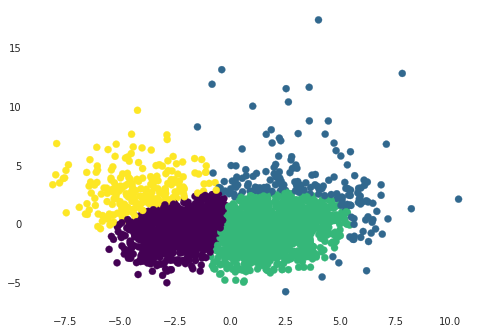

In [50]:
import matplotlib.pyplot as plt
plt.scatter(pca_processed[:, 0], pca_processed[:, 1], c=y_gmm, s=50, cmap='viridis')

# centers = kmeans.cluster_centers_
# plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [290]:
pca_processed.shape

(2533, 2)

In [0]:
processed_two['cluster_id'] = y_gmm

In [52]:
processed_two['cluster_id']

0       0
1       2
2       2
3       2
4       2
       ..
2529    0
2530    2
2531    0
2532    2
2533    3
Name: cluster_id, Length: 2534, dtype: int64

In [70]:
processed_two.loc[processed_two['cluster_id']==2]['BODY MASS INDEX'].mean()

27.519607401448077